In [1]:
import numpy as np
import matplotlib.pyplot as plt
import read_emcee_samples as res

In [2]:
nwalkers, num_iter, ndim = 100, 50000, 9
n_burnin = 45000

param_vec = ['mc', 'q','dL', 'i', 't0', 'phi0', 'ra', 'sin_dec', 'pol']
bins_map = {'mc':np.linspace(18.,21.,30), 'q':np.linspace(0.1,0.2,30), 'dL':np.linspace(100.,1000.,30), 'i':np.linspace(0,np.pi,30), 
            't0':np.linspace(-0.05, 0.05, 30), 'phi0':np.linspace(-np.pi, 2*np.pi, 30), 'ra':np.linspace(0., np.pi, 30), 
            'sin_dec':np.linspace(-1,1, 30), 'pol':np.linspace(0., np.pi, 30)}

In [3]:
iota_list = [0.00,0.79,1.05,1.57]
psi_list = [0.00, -1.57]

cosiota_sampl_list = [True, False]
cosiota_sampl_loc_map = {False:'../runs/SXS_four_modes_20181223_pe',True:'../runs/SXS_four_modes_20181223_cosiota_pe'}
ls_map = {True:'solid',False:'dashed'}

/home/abhirup/src/pycbc/lib/python2.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/home/abhirup/src/pycbc/local/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/abhirup/src/pycbc/local/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/home/abhirup/src/pycbc/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()


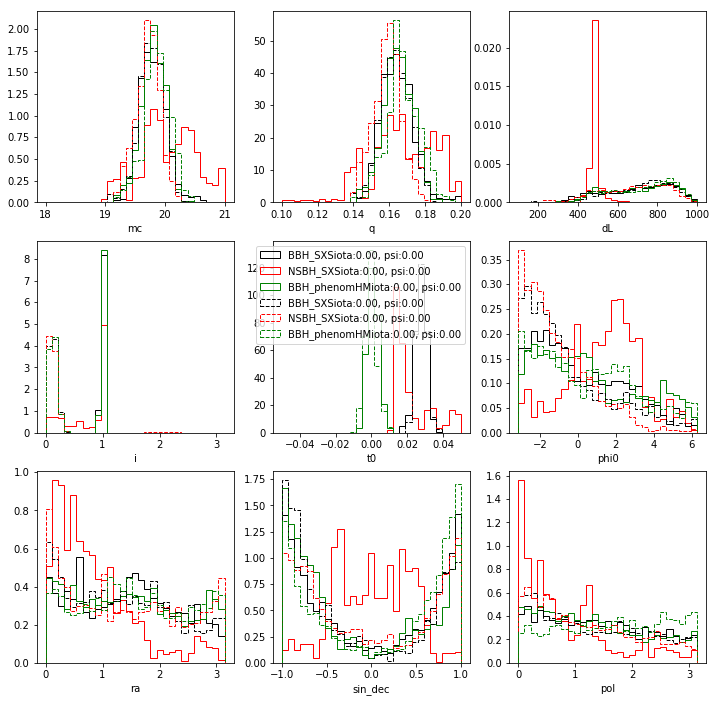

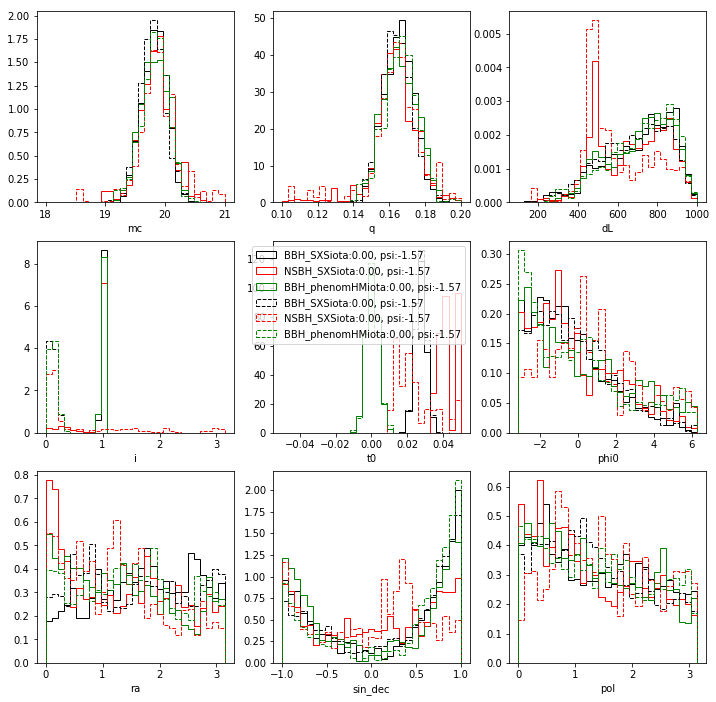

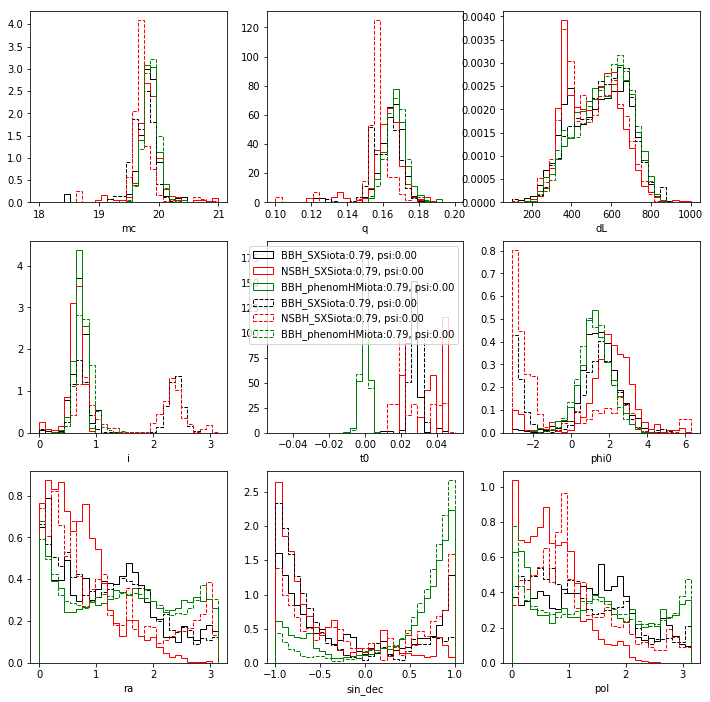

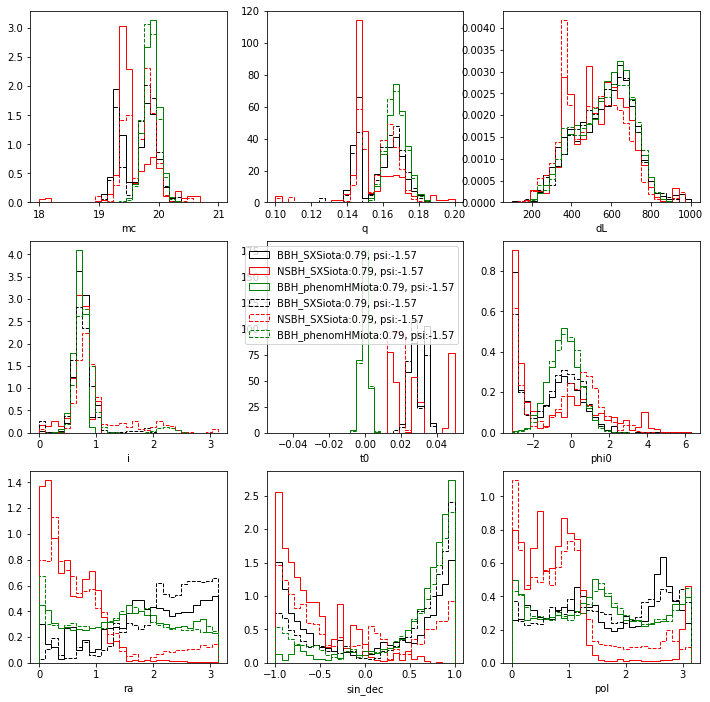

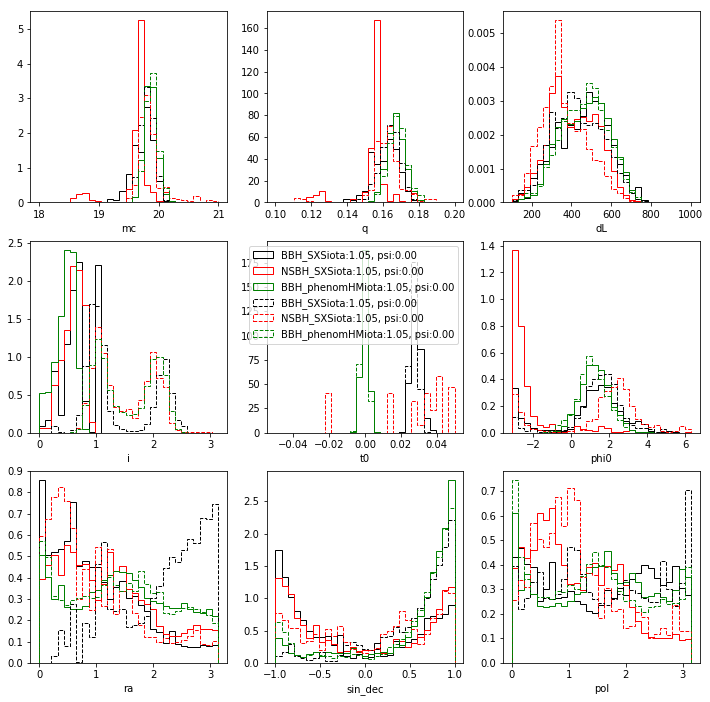

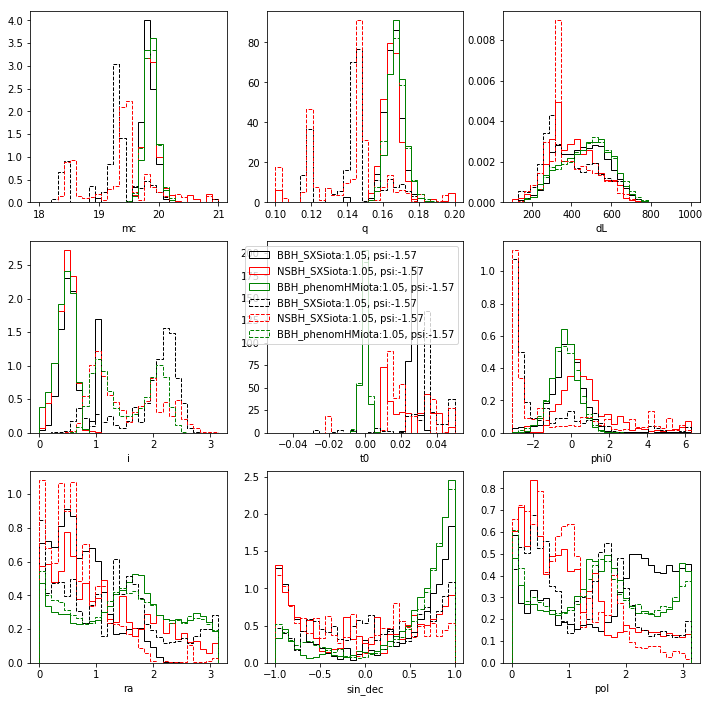

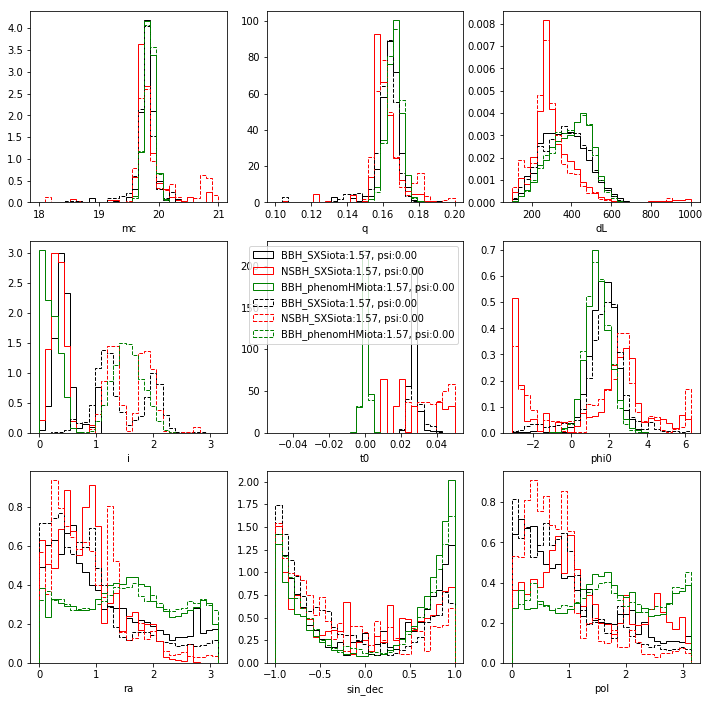

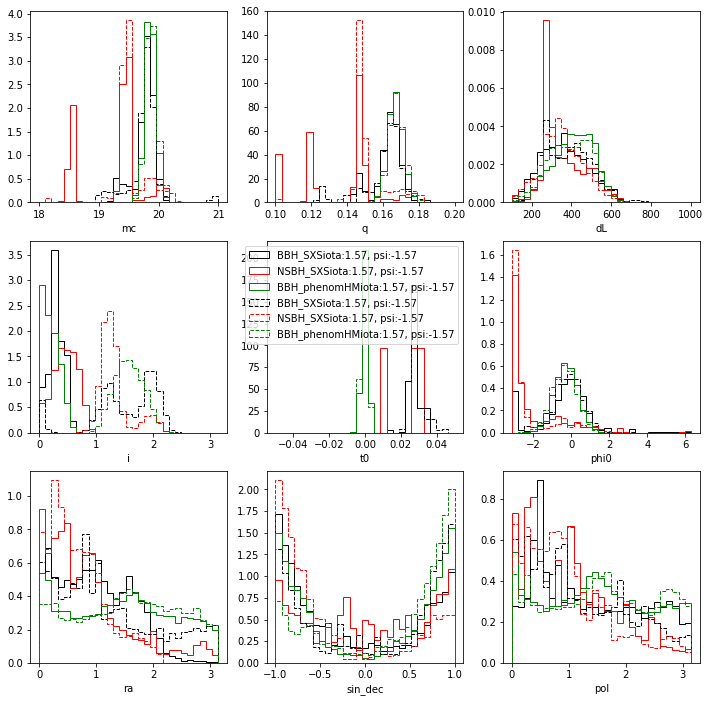

In [4]:
for iota in iota_list:
    for psi in psi_list:
        plt.figure(figsize=(12,12))
        for cosiota_sampl in cosiota_sampl_list:
             
            sxs_bbh_loc = cosiota_sampl_loc_map[cosiota_sampl] + '/BBH_M_70.00_iota_%.2f_psi_%.2f_t0_0_sxs/emcee_samples.dat'%(iota, psi)
            sxs_nsbh_loc = cosiota_sampl_loc_map[cosiota_sampl] + '/NSBH_M_70.00_iota_%.2f_psi_%.2f_t0_0_sxs/emcee_samples.dat'%(iota, psi)
            hm_loc = cosiota_sampl_loc_map[cosiota_sampl] + '/BBH_M_70.00_iota_%.2f_psi_%.2f_t0_0_phenomhm/emcee_samples.dat'%(iota, psi)
            label_map = {sxs_bbh_loc:'BBH_SXS', sxs_nsbh_loc:'NSBH_SXS', hm_loc:'BBH_phenomHM'}
            color_map = {sxs_bbh_loc:'k', sxs_nsbh_loc:'r', hm_loc:'g'}

            for loc in [sxs_bbh_loc, sxs_nsbh_loc, hm_loc]:
                mc, q, dL, i, t0, phi0, ra, sin_dec, pol = res.read_emcee_samples_9dim(loc, nwalkers, num_iter, ndim, n_burnin)
                samples = mc, q, dL, i, t0, phi0, ra, sin_dec, pol
                for (idx, param) in enumerate(param_vec):
                    plt.subplot(3,3,idx+1)
                    plt.hist(samples[idx], bins=bins_map[param], histtype='step', normed=True, label=label_map[loc]+'iota:%.2f, psi:%.2f'%(iota, psi),ls=ls_map[cosiota_sampl],color=color_map[loc])
                    plt.hold(True)
                    plt.xlabel(param)
                    if idx == 4:
                        plt.legend(loc='best')    
        plt.show()
                